In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import mglearn
from matplotlib import pyplot as plt
import numpy as np

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [3]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

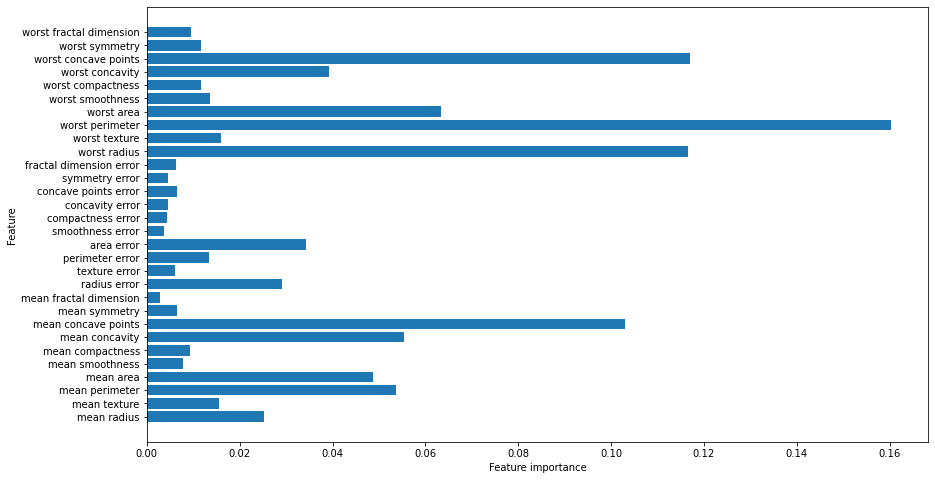

In [4]:
plt.figure(figsize=(14, 8))
plot_feature_importances_cancer(forest)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [6]:
gbrt_1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt_1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt_1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_1.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [7]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


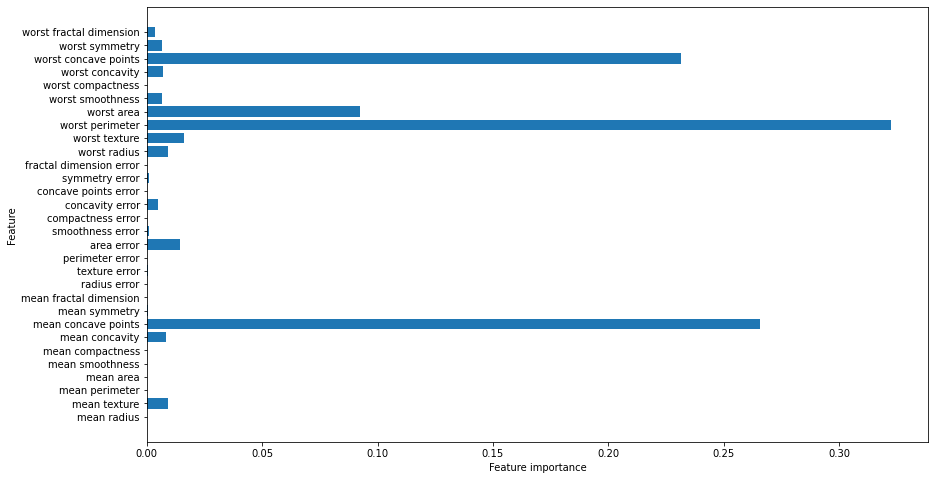

In [8]:
plt.figure(figsize=(14, 8))
plot_feature_importances_cancer(gbrt_1)

In [9]:
from sklearn.datasets import make_circles

### 不添加噪音的数据

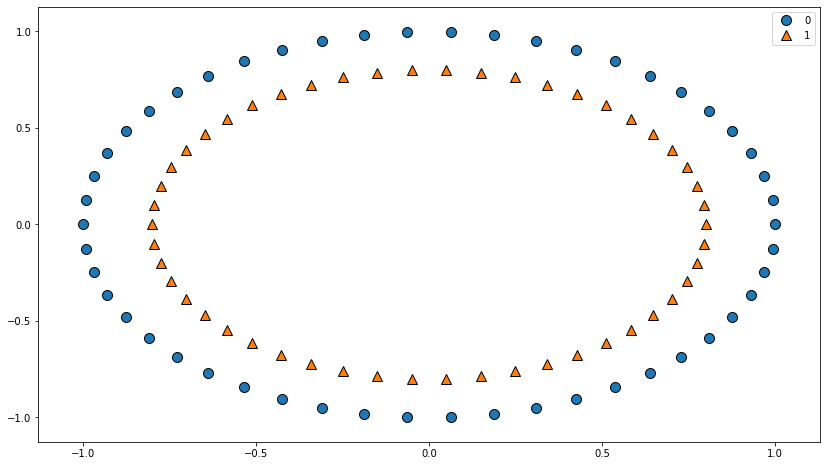

In [10]:
X, y = make_circles()

plt.figure(figsize=(14, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(loc="best")
plt.show()

In [11]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 为了便于说明，我们将两个类别重命名为"blue"和"red"
y_named = np.array(["blue", "red"])[y]

# 我们可以对任意个数组调用train_test_split
# 所有数组的划分方式都是一致的
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 构建梯度提升模型
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [12]:
import mglearn
from matplotlib import pyplot as plt

In [13]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
    gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [14]:
gbrt.decision_function(X_test) > 0

array([ True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False])

In [15]:
gbrt.predict(X_test)

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [16]:
(gbrt.decision_function(X_test) > 0).astype(int)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [17]:
# 将布尔值True/False转换成0和1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# 利用0和1作为classes_的索引
pred = gbrt.classes_[greater_zero]   # 把类别数字转为类别名
# pred与gbrt.predict的输出完全相同
print("pred is equal to predictions: {}".format(
    np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [18]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29
